In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-west-2a.csv', index_col='Time', parse_dates=True)
df

,Unnamed: 0,Price
Time,,
2021-03-29,0,0.157533
2021-03-30,1,0.158067
2021-03-31,2,0.158300
2021-04-01,3,0.158625
2021-04-02,4,0.159125
...,...,...
2021-06-23,86,0.131600
2021-06-24,87,0.131400
2021-06-25,88,0.131350


In [3]:
df = df.drop("Unnamed: 0", axis=1)
df

,Price
Time,
2021-03-29,0.157533
2021-03-30,0.158067
2021-03-31,0.158300
2021-04-01,0.158625
2021-04-02,0.159125
...,...
2021-06-23,0.131600
2021-06-24,0.131400
2021-06-25,0.131350


In [4]:
df.index.freq = "D"
df.head()

,Price
Time,
2021-03-29,0.157533
2021-03-30,0.158067
2021-03-31,0.158300
2021-04-01,0.158625
2021-04-02,0.159125


<Axes: xlabel='Time'>

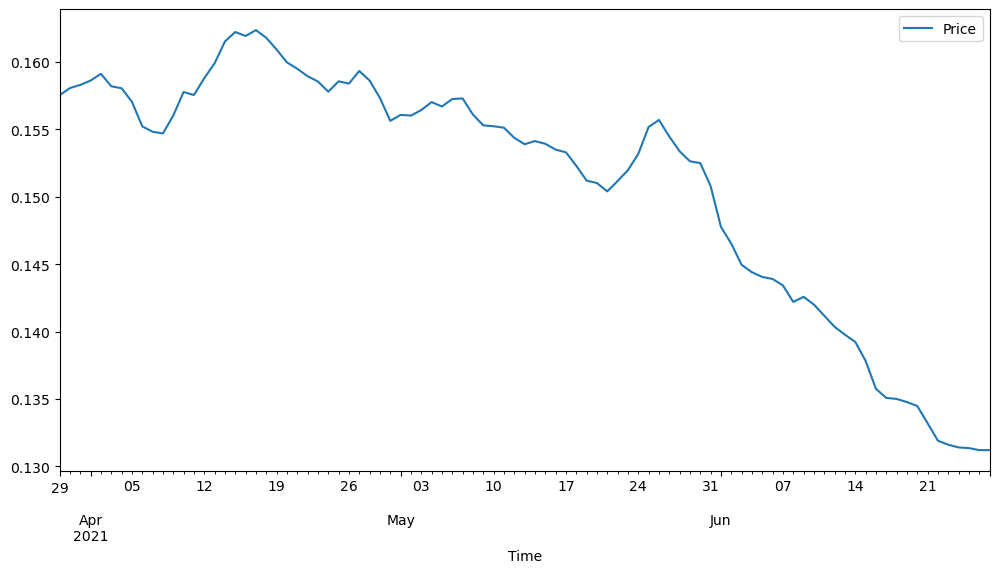

In [5]:
df.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

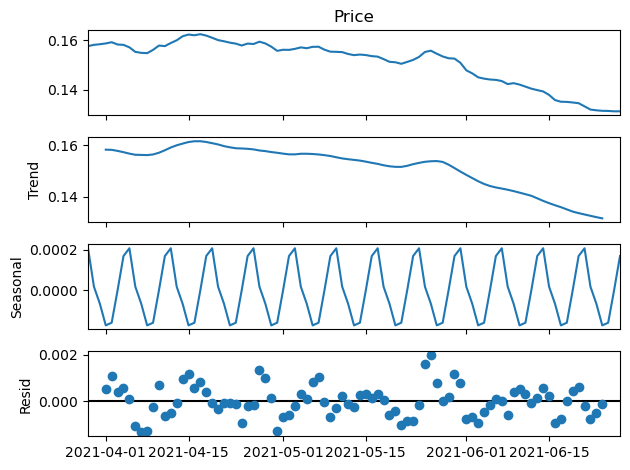

In [7]:
results = seasonal_decompose(df['Price'])
results.plot();

In [8]:
len(df)

91

# Train and Test 

In [9]:
train = df.iloc[:72]
test = df.iloc[72:]

In [10]:
train, test

(               Price
 Time                
 2021-03-29  0.157533
 2021-03-30  0.158067
 2021-03-31  0.158300
 2021-04-01  0.158625
 2021-04-02  0.159125
 ...              ...
 2021-06-04  0.144400
 2021-06-05  0.144050
 2021-06-06  0.143900
 2021-06-07  0.143425
 2021-06-08  0.142200
 
 [72 rows x 1 columns],
                Price
 Time                
 2021-06-09  0.142575
 2021-06-10  0.142000
 2021-06-11  0.141175
 2021-06-12  0.140350
 2021-06-13  0.139767
 2021-06-14  0.139233
 2021-06-15  0.137825
 2021-06-16  0.135750
 2021-06-17  0.135075
 2021-06-18  0.135000
 2021-06-19  0.134767
 2021-06-20  0.134475
 2021-06-21  0.133200
 2021-06-22  0.131900
 2021-06-23  0.131600
 2021-06-24  0.131400
 2021-06-25  0.131350
 2021-06-26  0.131200
 2021-06-27  0.131200)

# Scaling the Data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
df.head(),df.tail()

(               Price
 Time                
 2021-03-29  0.157533
 2021-03-30  0.158067
 2021-03-31  0.158300
 2021-04-01  0.158625
 2021-04-02  0.159125,
               Price
 Time               
 2021-06-23  0.13160
 2021-06-24  0.13140
 2021-06-25  0.13135
 2021-06-26  0.13120
 2021-06-27  0.13120)

In [13]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [14]:
scaled_train[:10]

array([[0.76033058],
       [0.78677686],
       [0.79834711],
       [0.81446281],
       [0.8392562 ],
       [0.79338843],
       [0.78595041],
       [0.73636364],
       [0.64586777],
       [0.62603306]])

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
num_inputs = 12

In [17]:
# define generator
n_input = num_inputs
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
generator

In [18]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.76033058 0.78677686 0.79834711 0.81446281 0.8392562  0.79338843
 0.78595041 0.73636364 0.64586777 0.62603306 0.61983471 0.68553719]
Predict this y: 
 [[0.77231405]]


In [19]:
X.shape

(1, 12, 1)

# LSTM MODEL

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [71]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0806
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 10/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 11/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 12/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 13/50
60/60 [==============================

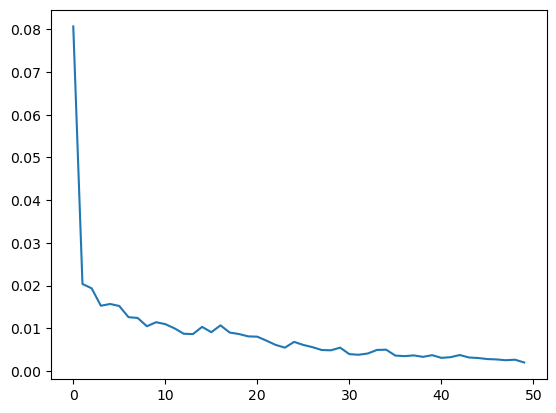

In [74]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [75]:
last_train_batch = scaled_train[-num_inputs:]

In [76]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

# Predicting

In [77]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 64ms/step


array([[0.00643962]], dtype=float32)

In [78]:
scaled_test[0]

array([0.01859504])

In [79]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 6ms/step


In [80]:
test_predictions

[array([0.00643962], dtype=float32),
 array([-0.01265999], dtype=float32),
 array([-0.03382019], dtype=float32),
 array([-0.05755205], dtype=float32),
 array([-0.08699507], dtype=float32),
 array([-0.11901952], dtype=float32),
 array([-0.15472175], dtype=float32),
 array([-0.19328853], dtype=float32),
 array([-0.23460692], dtype=float32),
 array([-0.27847636], dtype=float32),
 array([-0.32489452], dtype=float32),
 array([-0.37360558], dtype=float32),
 array([-0.42655692], dtype=float32),
 array([-0.48425364], dtype=float32),
 array([-0.5487447], dtype=float32),
 array([-0.6241706], dtype=float32),
 array([-0.71540093], dtype=float32),
 array([-0.8305456], dtype=float32),
 array([-0.9795026], dtype=float32)]

In [81]:
test.head()

,Price,Predictions
Time,,
2021-06-09,0.142575,0.141789
2021-06-10,0.142000,0.140981
2021-06-11,0.141175,0.140093
2021-06-12,0.140350,0.139136
2021-06-13,0.139767,0.138122


In [82]:
true_predictions = scaler.inverse_transform(test_predictions)

In [83]:
true_predictions

array([[0.14232987],
       [0.14194469],
       [0.14151796],
       [0.14103937],
       [0.1404456 ],
       [0.13979977],
       [0.13907978],
       [0.13830201],
       [0.13746876],
       [0.13658406],
       [0.13564796],
       [0.13466562],
       [0.13359777],
       [0.13243422],
       [0.13113365],
       [0.12961256],
       [0.12777275],
       [0.12545066],
       [0.1224467 ]])

In [84]:
test['Predictions'] = true_predictions

/var/folders/nk/qlz_hp8560397kpbstmqzwhh0000gn/T/ipykernel_6373/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [85]:
test

,Price,Predictions
Time,,
2021-06-09,0.142575,0.142330
2021-06-10,0.142000,0.141945
2021-06-11,0.141175,0.141518
2021-06-12,0.140350,0.141039
2021-06-13,0.139767,0.140446
2021-06-14,0.139233,0.139800
2021-06-15,0.137825,0.139080
2021-06-16,0.135750,0.138302
2021-06-17,0.135075,0.137469


In [86]:
my_predictions = test.copy()
my_predictions.drop('Price', axis='columns', inplace=True)
my_predictions

,Predictions
Time,
2021-06-09,0.142330
2021-06-10,0.141945
2021-06-11,0.141518
2021-06-12,0.141039
2021-06-13,0.140446
2021-06-14,0.139800
2021-06-15,0.139080
2021-06-16,0.138302
2021-06-17,0.137469


In [87]:
my_test = test.copy()
my_test.drop("Predictions",axis='columns' , inplace=True)
my_test

,Price
Time,
2021-06-09,0.142575
2021-06-10,0.142000
2021-06-11,0.141175
2021-06-12,0.140350
2021-06-13,0.139767
2021-06-14,0.139233
2021-06-15,0.137825
2021-06-16,0.135750
2021-06-17,0.135075


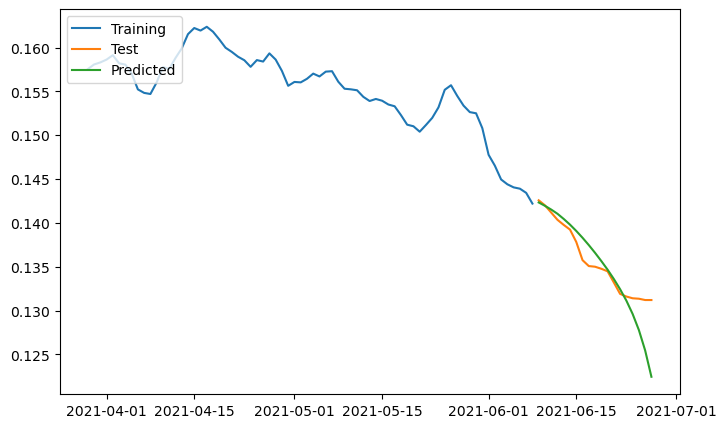

In [88]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(my_test, label='Test')
# plt.plot(df, label='Data')
plt.plot(my_predictions, label="Predicted")
plt.legend(loc="upper left")
plt.show()

<Axes: xlabel='Time'>

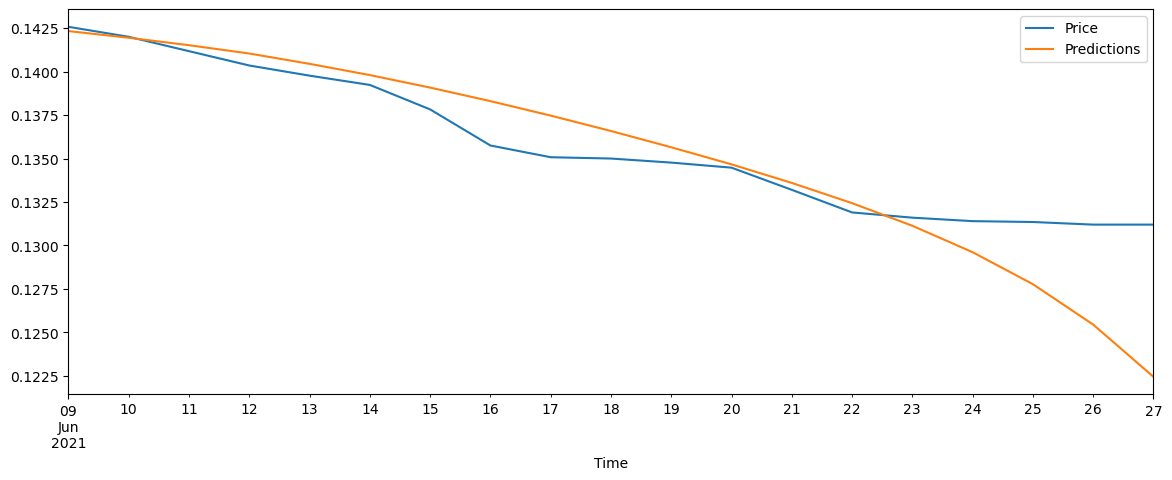

In [90]:
test.plot(figsize=(14,5))

# RMSE and R2 Values

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(test['Price'],test['Predictions']))
print(rmse)

0.002761629438128798


In [92]:
rmse

0.002761629438128798

In [93]:
r2 = r2_score(test['Price'],test['Predictions'])
r2

0.5014161720606969

In [94]:
my_predictions.to_csv("results_r3_west_2a.csv")

In [95]:
my_predictions.describe()

,Predictions
count,19.000000
mean,0.135330
std,0.005877
min,0.122447
25%,0.131784
50%,0.136584
75%,0.140123
max,0.142330


In [96]:
test

,Price,Predictions
Time,,
2021-06-09,0.142575,0.142330
2021-06-10,0.142000,0.141945
2021-06-11,0.141175,0.141518
2021-06-12,0.140350,0.141039
2021-06-13,0.139767,0.140446
2021-06-14,0.139233,0.139800
2021-06-15,0.137825,0.139080
2021-06-16,0.135750,0.138302
2021-06-17,0.135075,0.137469


In [97]:
test.to_csv("results_full_r3_west_2a.csv")

In [98]:
des_df = test.describe().copy()
des_df

,Price,Predictions
count,19.000000,19.000000
mean,0.135781,0.135330
std,0.004018,0.005877
min,0.131200,0.122447
25%,0.131750,0.131784
50%,0.135000,0.136584
75%,0.139500,0.140123
max,0.142575,0.142330


In [99]:
des_df

,Price,Predictions
count,19.000000,19.000000
mean,0.135781,0.135330
std,0.004018,0.005877
min,0.131200,0.122447
25%,0.131750,0.131784
50%,0.135000,0.136584
75%,0.139500,0.140123
max,0.142575,0.142330


In [100]:
des_df.to_csv("Predicted Description_r3_west_2a.csv")

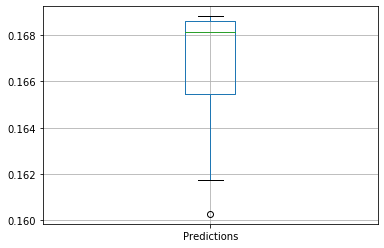

In [197]:
test.boxplot(column=["Predictions"])
plt.show()